# Part 1 - Exploratory data analysys

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
% matplotlib inline

In [2]:
logins = pd.read_json('logins.json')
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins = logins.sort_values('login_time')

In [5]:
logins['15_min_rounded'] = logins.login_time.dt.round('15min')

In [6]:
logins.head()

,login_time,15_min_rounded
6,1970-01-01 20:12:16,1970-01-01 20:15:00
0,1970-01-01 20:13:18,1970-01-01 20:15:00
1,1970-01-01 20:16:10,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1970-01-01 20:15:00


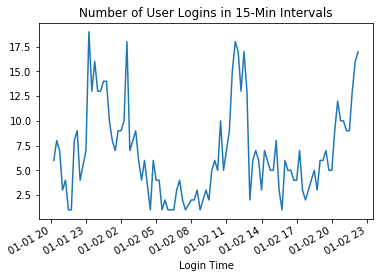

In [7]:
logins.groupby('15_min_rounded').count()[:100].plot(legend=False)
plt.title('Number of User Logins in 15-Min Intervals')
plt.xlabel('Login Time')
plt.show()

In [8]:
logins['weekday'] = logins['15_min_rounded'].dt.weekday
logins['count'] = 1

In [9]:
logins.head()

,login_time,15_min_rounded,weekday,count
6,1970-01-01 20:12:16,1970-01-01 20:15:00,3,1
0,1970-01-01 20:13:18,1970-01-01 20:15:00,3,1
1,1970-01-01 20:16:10,1970-01-01 20:15:00,3,1
3,1970-01-01 20:16:36,1970-01-01 20:15:00,3,1
2,1970-01-01 20:16:37,1970-01-01 20:15:00,3,1


Text(0,0.5,'Count of Logins')

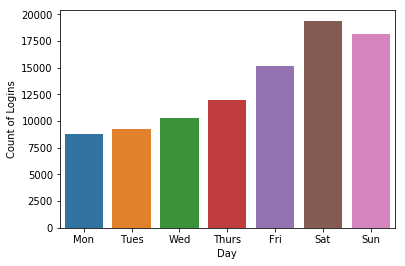

In [10]:
day_count = logins.groupby('weekday').count()
day_count.index = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
day_count.reset_index(inplace=True)
sns.barplot(x='index', y='count', data=day_count)
plt.xlabel('Day')
plt.ylabel('Count of Logins')

As we can see login activity increases during the weekend. Let's see how it varies during the day.

Text(0.5,1,'Logins By Hour')

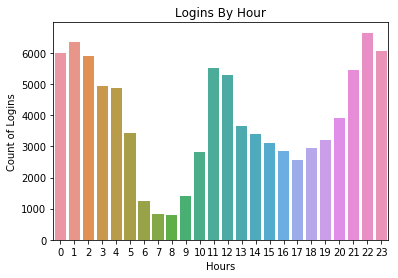

In [11]:
logins['hour'] = logins['15_min_rounded'].dt.hour
count_hour = logins.groupby('hour').sum()
count_hour.reset_index(inplace=True)
sns.barplot(x='hour', y='count', data=count_hour)
plt.xlabel('Hours')
plt.ylabel('Count of Logins')
plt.title('Logins By Hour')

During the day login activity increases in lunch hours: 11-12, and in the night hours, during working hours activity is much lower, that makes sense.